In [60]:
import sys
sys.path.append("..")

from ai   import *
from environment import *
from IPython.display import clear_output
import tqdm
from multiprocessing import Process, Manager
import multiprocessing
import os
from itertools import product
import matplotlib.pylab as plt

In [61]:


def simulationArena(env,a1,a2, iterations):
    epsilon = 0.1
    jimi, sumi = a1,a2

    for ep in range(iterations):
        jimi.setEpsilon(epsilon)
        sumi.setEpsilon(epsilon)

        while True:
        
            action = jimi.deside(env.boardMap)
            if action == (-1,-1):
                print("ERRRRR")
            env.put(2, action)

            if env.howIsTheWinner() == 2:
                jimi.giveReward(1,True)
                sumi.giveReward(-1,True)
                # print('\nWinner is 2')
                jimi.score+=1
                break
            
            elif env.isBoardFull():
                jimi.giveReward(0,True)
                sumi.giveReward(0,True)
                break

    ########################################
            
            action = sumi.deside(env.boardMap)
            if action == (-1,-1):
                print("ERRRRR")
            env.put(1, action)

            if env.howIsTheWinner() == 1:
                jimi.giveReward(-1,True)
                sumi.giveReward(1,True)
                # print('\nWinner is 1')
                sumi.score+=1
                break

            elif env.isBoardFull():
                jimi.giveReward(0,True)
                sumi.giveReward(0,True)
                break

        jimi.deside(env.boardMap)
        sumi.deside(env.boardMap)
        jimi.reset()
        sumi.reset()
        env.reset()



        epsilon = epsilon*0.9 if epsilon> 0.1 else 0.1

    scores = [jimi.score,sumi.score]
    jimi.score,sumi.score = 0,0
    return scores
    

In [62]:
boardSize = (4,4)
jimi = Agent(2,boardSize)
sumi = Agent(1,boardSize)
env = Board(boardSize)


[4701, 271]


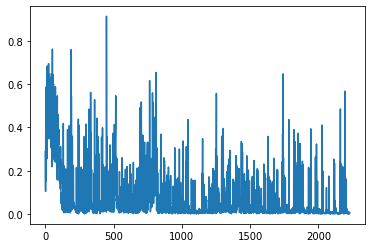

In [104]:
print(simulationArena(Board(boardSize),jimi, dummyAgent(1,boardSize),5000))
plt.plot(jimi.brain.learingHistory)


[833, 167]


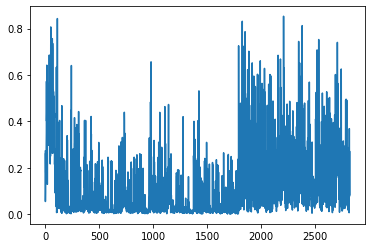

In [101]:
print(simulationArena(Board(boardSize),jimi, sumi,1000))
plt.plot(jimi.brain.learingHistory)


In [96]:
i = random.randint(0,len(jimi.de[0])-1)
print(len(jimi.valueAble_xps['states']),i)
jimi.valueAble_xps['states'][i],jimi.valueAble_xps['new_values'][i]
# jimi.de[0][i],jimi.de[1][i]

32 7


(tensor([[[[1., 1., 0., 1.],
           [1., 1., 1., 1.],
           [1., 1., 1., 1.],
           [0., 0., 0., 0.]],
 
          [[0., 0., 1., 0.],
           [0., 0., 0., 0.],
           [0., 0., 0., 0.],
           [0., 0., 0., 1.]],
 
          [[0., 0., 0., 0.],
           [0., 0., 0., 0.],
           [0., 0., 0., 0.],
           [1., 1., 1., 0.]]]]),
 tensor([1.]))

In [83]:
jimi.brain(torch.tensor([
        [[[1., 0., 0., 1.],
          [0., 1., 0., 1.],
          [0., 1., 1., 1.],
          [0., 0., 1., 1.]],
 
         [[0., 1., 1., 0.],
          [0., 0., 1., 0.],
          [0., 1., 0., 0.],
          [0., 0., 0., 0.]],
 
         [[0., 1., 0., 0.],
          [1., 0., 0., 0.],
          [1., 1., 0., 0.],
          [1., 1., 0., 0.]]]
          ]))

tensor([[0.6908]], grad_fn=<AddmmBackward>)

In [2]:
a = [1,2,3]
i = [1,3]
a[i]

TypeError: list indices must be integers or slices, not list

In [105]:
jimi.setEpsilon(0.1)
jimi.reset()
env.reset()

for _ in range(5):
    running = True
    while running:
        action = jimi.deside(env.boardMap)
        env.put(2, action)

        if env.howIsTheWinner() == 2:
            jimi.giveReward(1, True)
            print('\nWinner is 2')
            print()
            break
        elif env.isBoardFull():
            jimi.giveReward(0, True)
            break

        env.humanTurn()

        if env.howIsTheWinner() == 1:
            jimi.giveReward(-1, True)
            print('\nWinner is 1')
            print()
            break
        elif env.isBoardFull():
            jimi.giveReward(0, True)
            break

    jimi.deside(env.boardMap)

    jimi.reset()
    env.reset()
    print()
    print('____________')

[[0 0 0 0]
 [0 0 2 0]
 [0 0 0 0]
 [0 0 0 0]]
[[1 0 0 0]
 [0 0 2 0]
 [0 0 2 0]
 [0 0 0 0]]

Winner is 2
[[0 0 0 0]
 [0 0 2 0]
 [0 0 0 0]
 [0 0 0 0]]
[[1 0 0 0]
 [0 0 2 0]
 [0 0 2 0]
 [0 0 0 0]]

Winner is 2
[[0 0 0 0]
 [0 0 2 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 1 0]
 [0 0 2 0]
 [0 0 2 0]
 [0 0 0 0]]
[[0 0 1 0]
 [0 2 2 0]
 [0 0 2 0]
 [0 0 1 0]]


In [56]:
jimi.valueAble_xps['states'][-3:],jimi.valueAble_xps['new_values'][-3:]

([tensor([[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]]),
  tensor([[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]]),
  tensor([[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]])],
 [tensor([0.]), tensor([0.]), tensor([0.])])

In [ ]:
f = toOneHot(np.zeros([4,4]))
f = torch.unsqueeze(f, 0)
h = jimi.brain

x.shape


torch.Size([1, 4, 4, 4])

In [ ]:
jimi.setEpsilon(0.1)
jimi.reset()
sumi.setEpsilon(0.1)
sumi.reset()
env.reset()

tq = tqdm.trange(2000)

for ep in tq:

    running = True
    

    while running:
        
        action = jimi.deside(env.boardMap)
        if action == (-1,-1):
            print("ERRRRR")
        env.put(2, action)

        if env.howIsTheWinner() == 2:
            jimi.giveReward(1,True)
            sumi.giveReward(-1,True)
            # print('\nWinner is 2')
            jimi.score+=1
            break
        
        elif env.isBoardFull():
            jimi.giveReward(0,True)
            sumi.giveReward(0,True)
            break

########################################
        
        action = sumi.deside(env.boardMap)
        if action == (-1,-1):
            print("ERRRRR")
        env.put(1, action)

        if env.howIsTheWinner() == 1:
            jimi.giveReward(-1,True)
            sumi.giveReward(1,True)
            # print('\nWinner is 1')
            sumi.score+=1
            break

        elif env.isBoardFull():
            jimi.giveReward(0,True)
            sumi.giveReward(0,True)
            break

        

    jimi.deside(env.boardMap)
    sumi.deside(env.boardMap)
    jimi.learn()
    sumi.learn()
    jimi.reset()
    sumi.reset()
    env.reset()

    if ep % 100 == 0:
        tq.set_description(str(jimi.score)+' vs '+str(sumi.score))
        jimi.score,sumi.score = 0,0
    

print("jimi: ",len(jimi.afterStateValues), 'score: ',jimi.score)
print("sumi: ",len(sumi.afterStateValues), 'score: ',sumi.score)
jimi.score,sumi.score = 0,0

0